# Jacob Liu

## Research question/interests

 My research questions is what are the most commonly used TFT combinations

In [65]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as pltingameDuration

In [66]:
rawdata=pd.read_csv("../data/raw/TFT_GrandMaster_MatchData.csv")

In [ ]:
rawdata.head()

,gameId,gameDuration,level,lastRound,Ranked,ingameDuration,combination,champion
0,KR_4254769102,2319.661377,9,38,1,2311.472168,"{'Blaster': 4, 'Chrono': 2, 'Cybernetic': 2, '...","{'Malphite': {'items': [], 'star': 2}, 'Blitzc..."
1,KR_4254769102,2319.661377,9,38,2,2311.472168,"{'Blaster': 2, 'Chrono': 2, 'Cybernetic': 6, '...","{'Fiora': {'items': [], 'star': 2}, 'Leona': {..."
2,KR_4254769102,2319.661377,9,37,3,2247.994873,"{'DarkStar': 2, 'Protector': 4, 'Rebel': 1, 'S...","{'JarvanIV': {'items': [], 'star': 3}, 'Sona':..."
3,KR_4254769102,2319.661377,7,33,4,1996.358643,"{'DarkStar': 2, 'Demolitionist': 1, 'Infiltrat...","{'KhaZix': {'items': [], 'star': 2}, 'KaiSa': ..."
4,KR_4254769102,2319.661377,8,31,5,1871.789551,"{'Chrono': 1, 'Cybernetic': 1, 'DarkStar': 3, ...","{'Leona': {'items': [], 'star': 1}, 'Mordekais..."


## Milestone 3

### Task1: EDA

In [ ]:
rawdata.combination.describe()

count                                                 80000
unique                                                26397
top       {'Blaster': 4, 'Chrono': 2, 'Cybernetic': 1, '...
freq                                                   3489
Name: combination, dtype: object

In [ ]:
rawdata['combination'][3]

"{'DarkStar': 2, 'Demolitionist': 1, 'Infiltrator': 4, 'MechPilot': 3, 'Set3_Sorcerer': 2, 'Set3_Void': 1, 'Valkyrie': 1}"

In [ ]:
rawdata.combination.unique()

array(["{'Blaster': 4, 'Chrono': 2, 'Cybernetic': 2, 'Mercenary': 1, 'Rebel': 3, 'Set3_Blademaster': 1, 'Set3_Brawler': 4, 'Set3_Void': 1, 'Valkyrie': 2}",
       "{'Blaster': 2, 'Chrono': 2, 'Cybernetic': 6, 'Infiltrator': 1, 'ManaReaver': 2, 'Set3_Blademaster': 3, 'Set3_Brawler': 1, 'Valkyrie': 1, 'Vanguard': 1}",
       "{'DarkStar': 2, 'Protector': 4, 'Rebel': 1, 'Set3_Celestial': 4, 'Set3_Mystic': 4, 'Sniper': 1, 'StarGuardian': 2}",
       ...,
       "{'Chrono': 2, 'Cybernetic': 1, 'DarkStar': 1, 'Infiltrator': 1, 'ManaReaver': 2, 'Set3_Blademaster': 3, 'Set3_Celestial': 2, 'Set3_Mystic': 2, 'SpacePirate': 1, 'Valkyrie': 2, 'Vanguard': 2}",
       "{'Blaster': 2, 'Chrono': 2, 'Demolitionist': 2, 'ManaReaver': 1, 'MechPilot': 1, 'Mercenary': 2, 'Rebel': 1, 'Set3_Brawler': 2, 'Set3_Celestial': 2, 'Set3_Mystic': 1, 'Set3_Void': 1, 'SpacePirate': 1, 'Valkyrie': 1}",
       "{'Blaster': 2, 'Chrono': 2, 'Cybernetic': 3, 'ManaReaver': 2, 'Rebel': 1, 'Set3_Blademaster': 1, 'Set3_Brawler

Average of in game duration is: 1875.54
Median of in game duration is: 1897.79


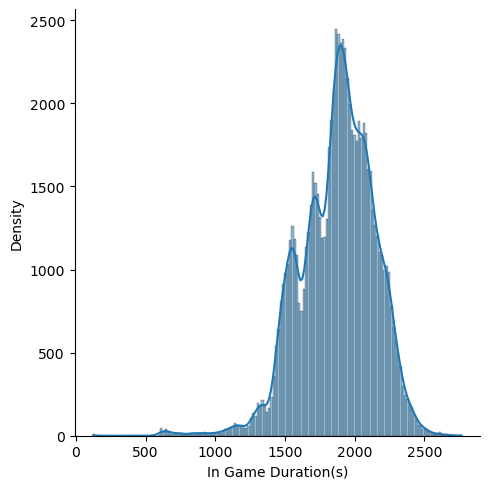

In [ ]:
# sns.countplot(data=rawdata,y='combination').set(title='fequency of combinatoin')
plot1=sns.displot(rawdata.ingameDuration,kde=True)
plot1.set_axis_labels('In Game Duration(s)','Density')
median=rawdata.ingameDuration.median()
avg=rawdata.ingameDuration.mean()
print(f'Average of in game duration is: {avg:.2f}')
print(f'Median of in game duration is: {median:.2f}')

The mean is 1875, the median os 1897. Notice that the mean is less than the median and the distribution of this plot is skewed to the left. For data from skewed distributions, the median is better than the mean for measuring central tendency, because it isn't influenced by extremely large values. Most people end the game at 1897 second. 

Average of in game duration is: 2154.34
Median of in game duration is: 2146.10


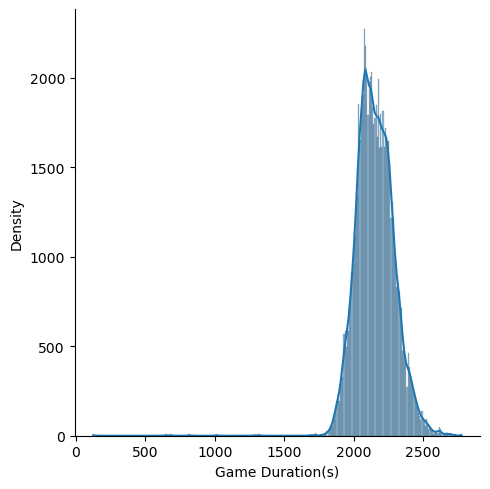

In [ ]:
plot2=sns.displot(rawdata.gameDuration,kde=True)
plot2.set_axis_labels('Game Duration(s)','Density')
median=rawdata.gameDuration.median()
avg=rawdata.gameDuration.mean()
print(f'Average of in game duration is: {avg:.2f}')
print(f'Median of in game duration is: {median:.2f}')

The mean is 2154, the median is 2146. Notice that the mean is larger than median. In a perfectly symmetrical distribution, the mean and the median are the same. The median is close to mean, so this histogram displays a symmetrical distibution of data. From the plot we can see that the most of game durations are about 2150 second.

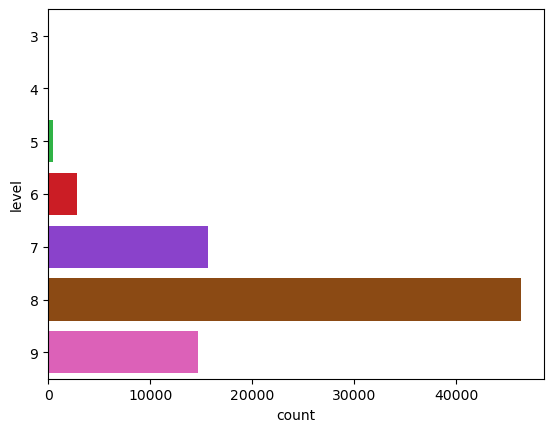

In [ ]:
# sns.color_palette('pastel')
# plot3=sns.displot(data=rawdata,x='ingameDuration',hue='level',kind='kde',palette='bright')
plot3=sns.countplot(data=rawdata,y='level',palette='bright')


The plot above show the counts of obervation in each level. Most people end the game when they are at level 8. Rarely people end the game when they are below level 6.

## Task 2: Set up an 'Analysis Pipeline'

In [67]:
data1=rawdata.drop(["gameId","gameDuration","level","lastRound","ingameDuration",'champion'], axis="columns")
data1=data1.drop(data1[data1.Ranked!=1].index)
data1=data1.reset_index()
data1.head()

,index,Ranked,combination
0,0,1,"{'Blaster': 4, 'Chrono': 2, 'Cybernetic': 2, '..."
1,8,1,"{'DarkStar': 3, 'Demolitionist': 1, 'Infiltrat..."
2,16,1,"{'DarkStar': 1, 'Demolitionist': 3, 'Infiltrat..."
3,24,1,"{'Chrono': 1, 'DarkStar': 3, 'Set3_Celestial':..."
4,32,1,"{'Blaster': 2, 'Demolitionist': 2, 'Mercenary'..."


In [68]:
import ast

In [69]:
#convert combination column from str to dict
data1['combination_dict']=data1['combination'].astype('str')
data1['combination_dict']=data1['combination_dict'].apply(lambda x: ast.literal_eval(x))
data1=data1.drop(["combination"], axis="columns")
data1.head()

,index,Ranked,combination_dict
0,0,1,"{'Blaster': 4, 'Chrono': 2, 'Cybernetic': 2, '..."
1,8,1,"{'DarkStar': 3, 'Demolitionist': 1, 'Infiltrat..."
2,16,1,"{'DarkStar': 1, 'Demolitionist': 3, 'Infiltrat..."
3,24,1,"{'Chrono': 1, 'DarkStar': 3, 'Set3_Celestial':..."
4,32,1,"{'Blaster': 2, 'Demolitionist': 2, 'Mercenary'..."


In [70]:
clist=[]
clist=data1['combination_dict'].apply(lambda x: list(set(x)))
uniqueCombination=[]
for i in clist:
    uniqueCombination=list(set(uniqueCombination+i))
sorted(uniqueCombination)


['Blaster',
 'Chrono',
 'Cybernetic',
 'DarkStar',
 'Demolitionist',
 'Infiltrator',
 'ManaReaver',
 'MechPilot',
 'Mercenary',
 'Protector',
 'Rebel',
 'Set3_Blademaster',
 'Set3_Brawler',
 'Set3_Celestial',
 'Set3_Mystic',
 'Set3_Sorcerer',
 'Set3_Void',
 'Sniper',
 'SpacePirate',
 'StarGuardian',
 'Starship',
 'TemplateTrait',
 'Valkyrie',
 'Vanguard']

In [71]:
data2=data1
# data2=pd.concat([data1,pd.DataFrame(columns=sorted(uniqueCombination))])
data2[[uniqueCombination]]=None
cols=['Ranked','combination_dict']+sorted(uniqueCombination)
data2=data2[cols]
data2.head()


,Ranked,combination_dict,Blaster,Chrono,Cybernetic,DarkStar,Demolitionist,Infiltrator,ManaReaver,MechPilot,...,Set3_Mystic,Set3_Sorcerer,Set3_Void,Sniper,SpacePirate,StarGuardian,Starship,TemplateTrait,Valkyrie,Vanguard
0,1,"{'Blaster': 4, 'Chrono': 2, 'Cybernetic': 2, '...",None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,1,"{'DarkStar': 3, 'Demolitionist': 1, 'Infiltrat...",None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,1,"{'DarkStar': 1, 'Demolitionist': 3, 'Infiltrat...",None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,1,"{'Chrono': 1, 'DarkStar': 3, 'Set3_Celestial':...",None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,1,"{'Blaster': 2, 'Demolitionist': 2, 'Mercenary'...",None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [74]:
for i in range(len(data2.combination_dict)):
    keylist=list(data2.combination_dict[i].keys())
    for k in keylist:
        value=data2.combination_dict[i].get(k)
        data2.at[i,k]=value

In [79]:
fdf=pd.DataFrame(columns=uniqueCombination,index=[0,1,2,3,4,5,6,7,8,9,10])

for col in fdf:
    d=dict(data2[col].value_counts())
    for key,value in d.items():
        fdf.at[key,col]=value
fdf

,Set3_Brawler,Infiltrator,TemplateTrait,ManaReaver,Set3_Void,Cybernetic,DarkStar,Sniper,Rebel,Protector,...,Blaster,Chrono,Starship,Demolitionist,Set3_Celestial,SpacePirate,Vanguard,MechPilot,Set3_Mystic,StarGuardian
0,259,24,NaN,NaN,85,28,31,14,20,6,...,38,NaN,16,9,173,21,47,9,272,69
1,1257,1372,2236,873,3968,3918,3012,531,2029,889,...,1332,1024,993,689,846,2748,2584,444,1414,1236
2,282,613,NaN,3065,23,390,1243,1912,761,1143,...,1178,5163,NaN,1271,2111,870,1818,3,2504,155
3,46,25,NaN,539,474,227,619,7,1294,149,...,36,457,NaN,79,262,31,34,1033,115,776
4,2244,905,NaN,NaN,NaN,19,65,NaN,124,349,...,1844,687,NaN,1,1346,99,578,NaN,225,274
5,NaN,53,NaN,NaN,NaN,5,3,NaN,6,26,...,8,49,NaN,NaN,119,NaN,2,NaN,NaN,58
6,NaN,48,NaN,NaN,NaN,745,263,NaN,88,39,...,NaN,33,NaN,NaN,164,NaN,NaN,NaN,NaN,602
7,NaN,1,NaN,NaN,NaN,NaN,85,NaN,18,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53
8,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
9,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Task 3. Method Chaining and writing Python programs

### Step 1: Build and test your method chain(s)

In [80]:
data2.to_csv('JLiu_processed_data.csv',index=None)

In [81]:
import pandas as pd
import numpy as np
import ast
import operator
from functools import reduce


In [82]:
df=(
    pd.read_csv("../data/raw/TFT_GrandMaster_MatchData.csv")
    .drop(["gameId","gameDuration","level","lastRound","ingameDuration",'champion'], axis="columns")
    .loc[lambda x: x['Ranked']==1]
    .reset_index()
    .drop(["index"], axis="columns")
    .assign(combination_dict=lambda df:
            df['combination'].apply(lambda x: ast.literal_eval(x)))
    .drop(["combination"], axis="columns")
)

df.head()

,Ranked,combination_dict
0,1,"{'Blaster': 4, 'Chrono': 2, 'Cybernetic': 2, '..."
1,1,"{'DarkStar': 3, 'Demolitionist': 1, 'Infiltrat..."
2,1,"{'DarkStar': 1, 'Demolitionist': 3, 'Infiltrat..."
3,1,"{'Chrono': 1, 'DarkStar': 3, 'Set3_Celestial':..."
4,1,"{'Blaster': 2, 'Demolitionist': 2, 'Mercenary'..."


In [83]:
clist=list(np.unique(reduce(operator.add, df.combination_dict.apply(lambda x: list(x.keys())))))
print(clist)

['Blaster', 'Chrono', 'Cybernetic', 'DarkStar', 'Demolitionist', 'Infiltrator', 'ManaReaver', 'MechPilot', 'Mercenary', 'Protector', 'Rebel', 'Set3_Blademaster', 'Set3_Brawler', 'Set3_Celestial', 'Set3_Mystic', 'Set3_Sorcerer', 'Set3_Void', 'Sniper', 'SpacePirate', 'StarGuardian', 'Starship', 'TemplateTrait', 'Valkyrie', 'Vanguard']


In [84]:
df = (
    df.join([ pd.DataFrame(None, index=df.index, columns=sorted(clist) )])
)
for i in range(len(df.combination_dict)):
    keylist=list(df.combination_dict[i].keys())
    for k in clist:
        value=df.combination_dict[i].get(k)
        df.at[i,k]=value
df.head()


,Ranked,combination_dict,Blaster,Chrono,Cybernetic,DarkStar,Demolitionist,Infiltrator,ManaReaver,MechPilot,...,Set3_Mystic,Set3_Sorcerer,Set3_Void,Sniper,SpacePirate,StarGuardian,Starship,TemplateTrait,Valkyrie,Vanguard
0,1,"{'Blaster': 4, 'Chrono': 2, 'Cybernetic': 2, '...",4,2,2,None,None,None,None,None,...,None,None,1,None,None,None,None,None,2,None
1,1,"{'DarkStar': 3, 'Demolitionist': 1, 'Infiltrat...",None,None,None,3,1,4,None,3,...,1,2,1,None,None,None,None,None,1,None
2,1,"{'DarkStar': 1, 'Demolitionist': 3, 'Infiltrat...",None,None,None,1,3,1,None,3,...,None,6,1,None,1,3,None,1,None,None
3,1,"{'Chrono': 1, 'DarkStar': 3, 'Set3_Celestial':...",None,1,None,3,None,None,None,None,...,2,None,None,2,1,1,None,None,None,4
4,1,"{'Blaster': 2, 'Demolitionist': 2, 'Mercenary'...",2,None,None,None,2,None,None,None,...,2,None,None,None,1,None,1,None,2,None


In [86]:
fdf=pd.DataFrame(columns=clist,index=[0,1,2,3,4,5,6,7,8,9,10])
for col in fdf:
    d=dict(df[col].value_counts())
    for key,value in d.items():
        fdf.at[key,col]=value
fdf

,Blaster,Chrono,Cybernetic,DarkStar,Demolitionist,Infiltrator,ManaReaver,MechPilot,Mercenary,Protector,...,Set3_Mystic,Set3_Sorcerer,Set3_Void,Sniper,SpacePirate,StarGuardian,Starship,TemplateTrait,Valkyrie,Vanguard
0,38,NaN,28,31,9,24,NaN,9,42,6,...,272,41,85,14,21,69,16,NaN,44,47
1,1332,1024,3918,3012,689,1372,873,444,3839,889,...,1414,364,3968,531,2748,1236,993,2236,2415,2584
2,1178,5163,390,1243,1271,613,3065,3,261,1143,...,2504,1606,23,1912,870,155,NaN,NaN,2386,1818
3,36,457,227,619,79,25,539,1033,NaN,149,...,115,55,474,7,31,776,NaN,NaN,15,34
4,1844,687,19,65,1,905,NaN,NaN,NaN,349,...,225,1184,NaN,NaN,99,274,NaN,NaN,NaN,578
5,8,49,5,3,NaN,53,NaN,NaN,NaN,26,...,NaN,85,NaN,NaN,NaN,58,NaN,NaN,NaN,2
6,NaN,33,745,263,NaN,48,NaN,NaN,NaN,39,...,NaN,394,NaN,NaN,NaN,602,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,85,NaN,1,NaN,NaN,NaN,NaN,...,NaN,5,NaN,NaN,NaN,53,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,1,...,NaN,16,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Step 2: Wrap your method chain(s) in a function

In [93]:
import pandas as pd
import numpy as np
import ast
import operator
from functools import reduce

def load_and_process(url_or_path_to_csv_file):
    #method1 chain: delete unnessesary columns, delete rows that rank not euqal to 1, convert 'combination' column to string list and add it to new list, drop 'combination' column
    df1=(
    pd.read_csv(url_or_path_to_csv_file)
    .drop(["gameId","gameDuration","level","lastRound","ingameDuration",'champion'], axis="columns")
    .loc[lambda x: x['Ranked']==1]
    .reset_index()
    .drop(["index"], axis="columns")
    .assign(combination_dict=lambda df:
            df['combination'].apply(lambda x: ast.literal_eval(x)))
    .drop(["combination"], axis="columns")
    )
    clist=list(np.unique(reduce(operator.add, df1.combination_dict.apply(lambda x: list(x.keys())))))
    
    #method2 chain create empty column for all unique 
    df2=df1.join([ pd.DataFrame(None, index=df1.index, columns=sorted(clist) )])
        

    for i in range(len(df2.combination_dict)):
        keylist=list(df2.combination_dict[i].keys())
        for k in clist:
            value=df2.combination_dict[i].get(k)
            df2.at[i,k]=value
    
    fdf=pd.DataFrame(columns=clist,index=[0,1,2,3,4,5,6,7,8,9,10])
    
    for col in fdf:
        d=dict(df2[col].value_counts())
        for key,value in d.items():
            fdf.at[key,col]=value        
    return fdf 


In [1]:
finalDataFrame=load_and_process("../data/raw/TFT_GrandMaster_MatchData.csv")
finalDataFrame

NameError: name 'load_and_process' is not defined

### Step 3: Move your function into a new .py file

In [2]:
import project_functions2

In [3]:
final_df = project_functions2.load_and_process("../data/raw/TFT_GrandMaster_MatchData.csv")
final_df

,Blaster,Chrono,Cybernetic,DarkStar,Demolitionist,Infiltrator,ManaReaver,MechPilot,Mercenary,Protector,...,Set3_Mystic,Set3_Sorcerer,Set3_Void,Sniper,SpacePirate,StarGuardian,Starship,TemplateTrait,Valkyrie,Vanguard
0,38,NaN,28,31,9,24,NaN,9,42,6,...,272,41,85,14,21,69,16,NaN,44,47
1,1332,1024,3918,3012,689,1372,873,444,3839,889,...,1414,364,3968,531,2748,1236,993,2236,2415,2584
2,1178,5163,390,1243,1271,613,3065,3,261,1143,...,2504,1606,23,1912,870,155,NaN,NaN,2386,1818
3,36,457,227,619,79,25,539,1033,NaN,149,...,115,55,474,7,31,776,NaN,NaN,15,34
4,1844,687,19,65,1,905,NaN,NaN,NaN,349,...,225,1184,NaN,NaN,99,274,NaN,NaN,NaN,578
5,8,49,5,3,NaN,53,NaN,NaN,NaN,26,...,NaN,85,NaN,NaN,NaN,58,NaN,NaN,NaN,2
6,NaN,33,745,263,NaN,48,NaN,NaN,NaN,39,...,NaN,394,NaN,NaN,NaN,602,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,85,NaN,1,NaN,NaN,NaN,NaN,...,NaN,5,NaN,NaN,NaN,53,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,1,...,NaN,16,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Task 4. Conduct your analysis to help answer your research question(s)

In [10]:
# plot1=sns.displot(data=df3,y=df3['Blaster'].count)

AttributeError: 'Series' object has no attribute 'freq'